# EDA on TRX - Milou

In [12]:

from dotenv import load_dotenv
import os

from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from pprint import pprint
import pandas as pd

load_dotenv()

API_KEY = os.getenv("COINMARKET_API")

API_URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest"

target_symbol = "TRX"

parameters = {
    "symbol": target_symbol,
    "convert": "SEK",
}

headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY,
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(API_URL, params=parameters)
    data = json.loads(response.text)["data"][target_symbol]
    pprint(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

trx_data = data["quote"]["SEK"]

df = pd.DataFrame([trx_data])
df["name"] = data["name"]
df["symbol"] = data["symbol"]

pprint(df)

{'circulating_supply': 86101154635.14195,
 'cmc_rank': 10,
 'date_added': '2017-09-13T00:00:00.000Z',
 'id': 1958,
 'infinite_supply': True,
 'is_active': 1,
 'is_fiat': 0,
 'last_updated': '2025-02-12T15:37:00.000Z',
 'max_supply': None,
 'name': 'TRON',
 'num_market_pairs': 1118,
 'platform': None,
 'quote': {'SEK': {'fully_diluted_market_cap': 227824901516.8304,
                   'last_updated': '2025-02-12T15:38:03.000Z',
                   'market_cap': 227824816384.7091,
                   'market_cap_dominance': 0.6641,
                   'percent_change_1h': 0.82349881,
                   'percent_change_24h': -0.96950193,
                   'percent_change_30d': 8.98968557,
                   'percent_change_60d': -14.81381514,
                   'percent_change_7d': 7.80715267,
                   'percent_change_90d': 36.61457785,
                   'price': 2.6460134866962983,
                   'tvl': None,
                   'volume_24h': 7377319742.901761,
              

In [17]:
df.head()

,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl,last_updated,name,symbol
0,2.636791,7.143926e+09,2.9499,0.276355,-1.480499,7.289668,9.049871,-15.378011,34.435773,2.270310e+11,0.6641,2.270311e+11,None,2025-02-12T14:56:03.000Z,TRON,TRX


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     1 non-null      float64
 1   volume_24h                1 non-null      float64
 2   volume_change_24h         1 non-null      float64
 3   percent_change_1h         1 non-null      float64
 4   percent_change_24h        1 non-null      float64
 5   percent_change_7d         1 non-null      float64
 6   percent_change_30d        1 non-null      float64
 7   percent_change_60d        1 non-null      float64
 8   percent_change_90d        1 non-null      float64
 9   market_cap                1 non-null      float64
 10  market_cap_dominance      1 non-null      float64
 11  fully_diluted_market_cap  1 non-null      float64
 12  tvl                       0 non-null      object 
 13  last_updated              1 non-null      object 
 14  name          

In [19]:
df.describe()

,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap
count,1.000000,1.000000e+00,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.0000,1.000000e+00
mean,2.636791,7.143926e+09,2.9499,0.276355,-1.480499,7.289668,9.049871,-15.378011,34.435773,2.270310e+11,0.6641,2.270311e+11
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.636791,7.143926e+09,2.9499,0.276355,-1.480499,7.289668,9.049871,-15.378011,34.435773,2.270310e+11,0.6641,2.270311e+11
25%,2.636791,7.143926e+09,2.9499,0.276355,-1.480499,7.289668,9.049871,-15.378011,34.435773,2.270310e+11,0.6641,2.270311e+11
50%,2.636791,7.143926e+09,2.9499,0.276355,-1.480499,7.289668,9.049871,-15.378011,34.435773,2.270310e+11,0.6641,2.270311e+11
75%,2.636791,7.143926e+09,2.9499,0.276355,-1.480499,7.289668,9.049871,-15.378011,34.435773,2.270310e+11,0.6641,2.270311e+11
max,2.636791,7.143926e+09,2.9499,0.276355,-1.480499,7.289668,9.049871,-15.378011,34.435773,2.270310e+11,0.6641,2.270311e+11


In [ ]:
print(f"TRX Price: {data['quote']['SEK']['price']} SEK") 
print(f"Market Cap: {data['quote']['SEK']['market_cap']} SEK")
print(f"24h Volume: {data['quote']['SEK']['volume_24h']} SEK")


TRX Price: 2.6367907266894326 SEK
Market Cap: 227031046156.39716 SEK
24h Volume: 7143926026.623618 SEK


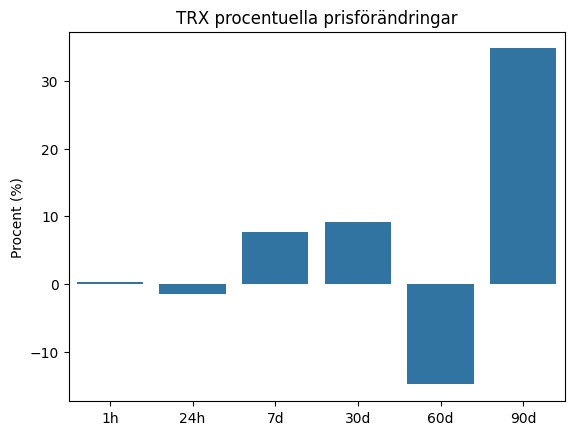

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=["1h", "24h", "7d", "30d", "60d", "90d"],
            y=df.iloc[0][["percent_change_1h", "percent_change_24h", "percent_change_7d",
                          "percent_change_30d", "percent_change_60d", "percent_change_90d"]])
plt.title("TRX procentuella prisförändringar")
plt.ylabel("Procent (%)")
plt.show()


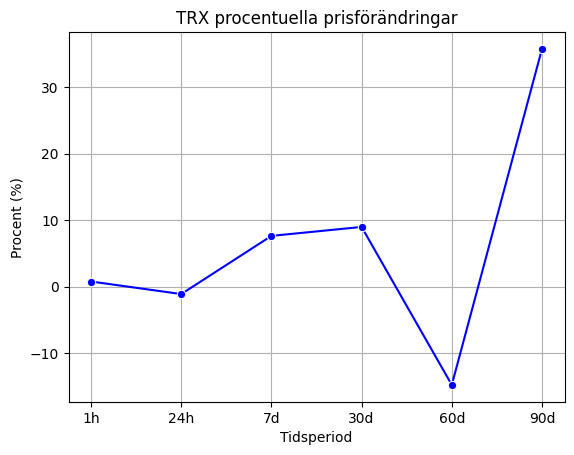

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skapa ett linjediagram istället för stapeldiagram
sns.lineplot(x=["1h", "24h", "7d", "30d", "60d", "90d"],
             y=df.iloc[0][["percent_change_1h", "percent_change_24h", 
                           "percent_change_7d", "percent_change_30d", 
                           "percent_change_60d", "percent_change_90d"]],
             marker="o", linestyle="-", color="b")  

plt.title("TRX procentuella prisförändringar")
plt.ylabel("Procent (%)")
plt.xlabel("Tidsperiod")
plt.grid(True)
plt.show()


In [5]:
print(df.describe())


          price    volume_24h  volume_change_24h  percent_change_1h  \
count  1.000000  1.000000e+00             1.0000           1.000000   
mean   2.644102  7.325099e+09             6.4565           0.752375   
std         NaN           NaN                NaN                NaN   
min    2.644102  7.325099e+09             6.4565           0.752375   
25%    2.644102  7.325099e+09             6.4565           0.752375   
50%    2.644102  7.325099e+09             6.4565           0.752375   
75%    2.644102  7.325099e+09             6.4565           0.752375   
max    2.644102  7.325099e+09             6.4565           0.752375   

       percent_change_24h  percent_change_7d  percent_change_30d  \
count             1.00000            1.00000            1.000000   
mean             -1.13517            7.61701            8.960147   
std                   NaN                NaN                 NaN   
min              -1.13517            7.61701            8.960147   
25%              -1.

In [17]:
from dotenv import load_dotenv
import os
import json
from pprint import pprint
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

load_dotenv()
API_KEY = os.getenv("COINMARKET_API")

API_URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

parameters = {
    "convert": "SEK",  
    "limit": 10        
}

headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY,
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(API_URL, params=parameters)
    data = json.loads(response.text)["data"]
    pprint(data[:2]) 

except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

df = pd.DataFrame(data)

quote_data = pd.json_normalize(df["quote"].apply(lambda x: x["SEK"]))

df = pd.concat([df, quote_data], axis=1)

df = df[["id", "name", "symbol", "price", "market_cap", "percent_change_1h", "percent_change_24h", "percent_change_7d"]]

print(df)


[{'circulating_supply': 19823240,
  'cmc_rank': 1,
  'date_added': '2010-07-13T00:00:00.000Z',
  'id': 1,
  'infinite_supply': False,
  'last_updated': '2025-02-12T15:48:00.000Z',
  'max_supply': 21000000,
  'name': 'Bitcoin',
  'num_market_pairs': 11937,
  'platform': None,
  'quote': {'SEK': {'fully_diluted_market_cap': 21858307893759.496,
                    'last_updated': '2025-02-12T15:48:03.000Z',
                    'market_cap': 20633451589137.555,
                    'market_cap_dominance': 60.2375,
                    'percent_change_1h': 0.03135104,
                    'percent_change_24h': -1.48128013,
                    'percent_change_30d': 3.34024891,
                    'percent_change_60d': -5.95596604,
                    'percent_change_7d': -2.67556855,
                    'percent_change_90d': 8.23571235,
                    'price': 1040871.8044647372,
                    'tvl': None,
                    'volume_24h': 485971712261.2471,
                    'volu

In [16]:
df.head(10)

,id,name,symbol,price,market_cap,percent_change_1h,percent_change_24h,percent_change_7d
0,1,Bitcoin,BTC,1.041120e+06,2.063837e+13,0.060065,-1.340475,-2.499726
1,1027,Ethereum,ETH,2.835457e+04,3.417947e+12,0.401211,-1.896021,-6.184015
2,825,Tether USDt,USDT,1.089351e+01,1.546369e+12,-0.017038,-0.015866,-0.026809
3,52,XRP,XRP,2.619773e+01,1.513247e+12,0.751115,-2.420468,-4.223470
4,5426,Solana,SOL,2.103541e+03,1.026915e+12,0.357235,-3.207482,-5.304936
5,1839,BNB,BNB,7.146870e+03,1.018281e+12,1.609281,3.069921,14.532688
6,3408,USDC,USDC,1.089343e+01,6.110333e+11,-0.026499,-0.011152,-0.001510
7,74,Dogecoin,DOGE,2.772408e+00,4.103621e+11,0.785164,-1.662750,-3.580038
8,2010,Cardano,ADA,8.456684e+00,2.976516e+11,0.008060,-2.241974,1.311622
9,1958,TRON,TRX,2.646776e+00,2.278902e+11,0.689673,-0.835913,7.999891
